In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

In [10]:
file = "/Users/priyanujkashyap/Documents/GitHub/KWS24/ICMEtracking/2012-12-14 LASCO C2.txt"

height = []
time = []
with open(file, 'r')as file:
    lines = file.readlines()[1:]
for line in lines:
    tim = (line.strip().split()[0])
    hei = (line.strip().split()[1])
    time.append(tim)
    height.append(hei)

In [11]:
t = []
for tim in time:
    ti = datetime.strptime(tim, '%Y-%m-%dT%H:%M:%S.%f')
    ti_hr = ti.hour + (ti.minute / 60) + (ti.second / 3600)
    t.append(ti_hr)

In [12]:
year = datetime.strptime(time[0], '%Y-%m-%dT%H:%M:%S.%f').year
mon = datetime.strptime(time[0], '%Y-%m-%dT%H:%M:%S.%f').strftime('%b')
day = datetime.strptime(time[0], '%Y-%m-%dT%H:%M:%S.%f').day
print(mon)

Dec


In [13]:
hei = []
for h in height:
    hei.append(float(h))

In [14]:
h_qua = np.polyfit(t,hei,2)
qua_fun = np.poly1d(h_qua)
hei_qua = qua_fun(t)

vel_fun_qua = qua_fun.deriv()
vel_kms_qua = vel_fun_qua* 7 * 10**(5)/(3600)
vel_qua = vel_kms_qua(t)

acc_fun_qua = vel_fun_qua.deriv()
acc_ms2_qua = acc_fun_qua* 7 * 10**(5) * 1000/((3600)**2)
acc_qua = acc_ms2_qua(t)

In [15]:
h_cub = np.polyfit(t,hei,3)
cub_fun = np.poly1d(h_cub)
hei_cub = cub_fun(t)

vel_fun_cub = cub_fun.deriv()
vel_kms_cub = vel_fun_cub* 7 * 10**(5)/(3600)
vel_cub = vel_kms_cub(t)

acc_fun_cub = vel_fun_cub.deriv()
acc_ms2_cub = acc_fun_cub* 7 * 10**(5) * 1000/((3600)**2)
acc_cub = acc_ms2_cub(t)

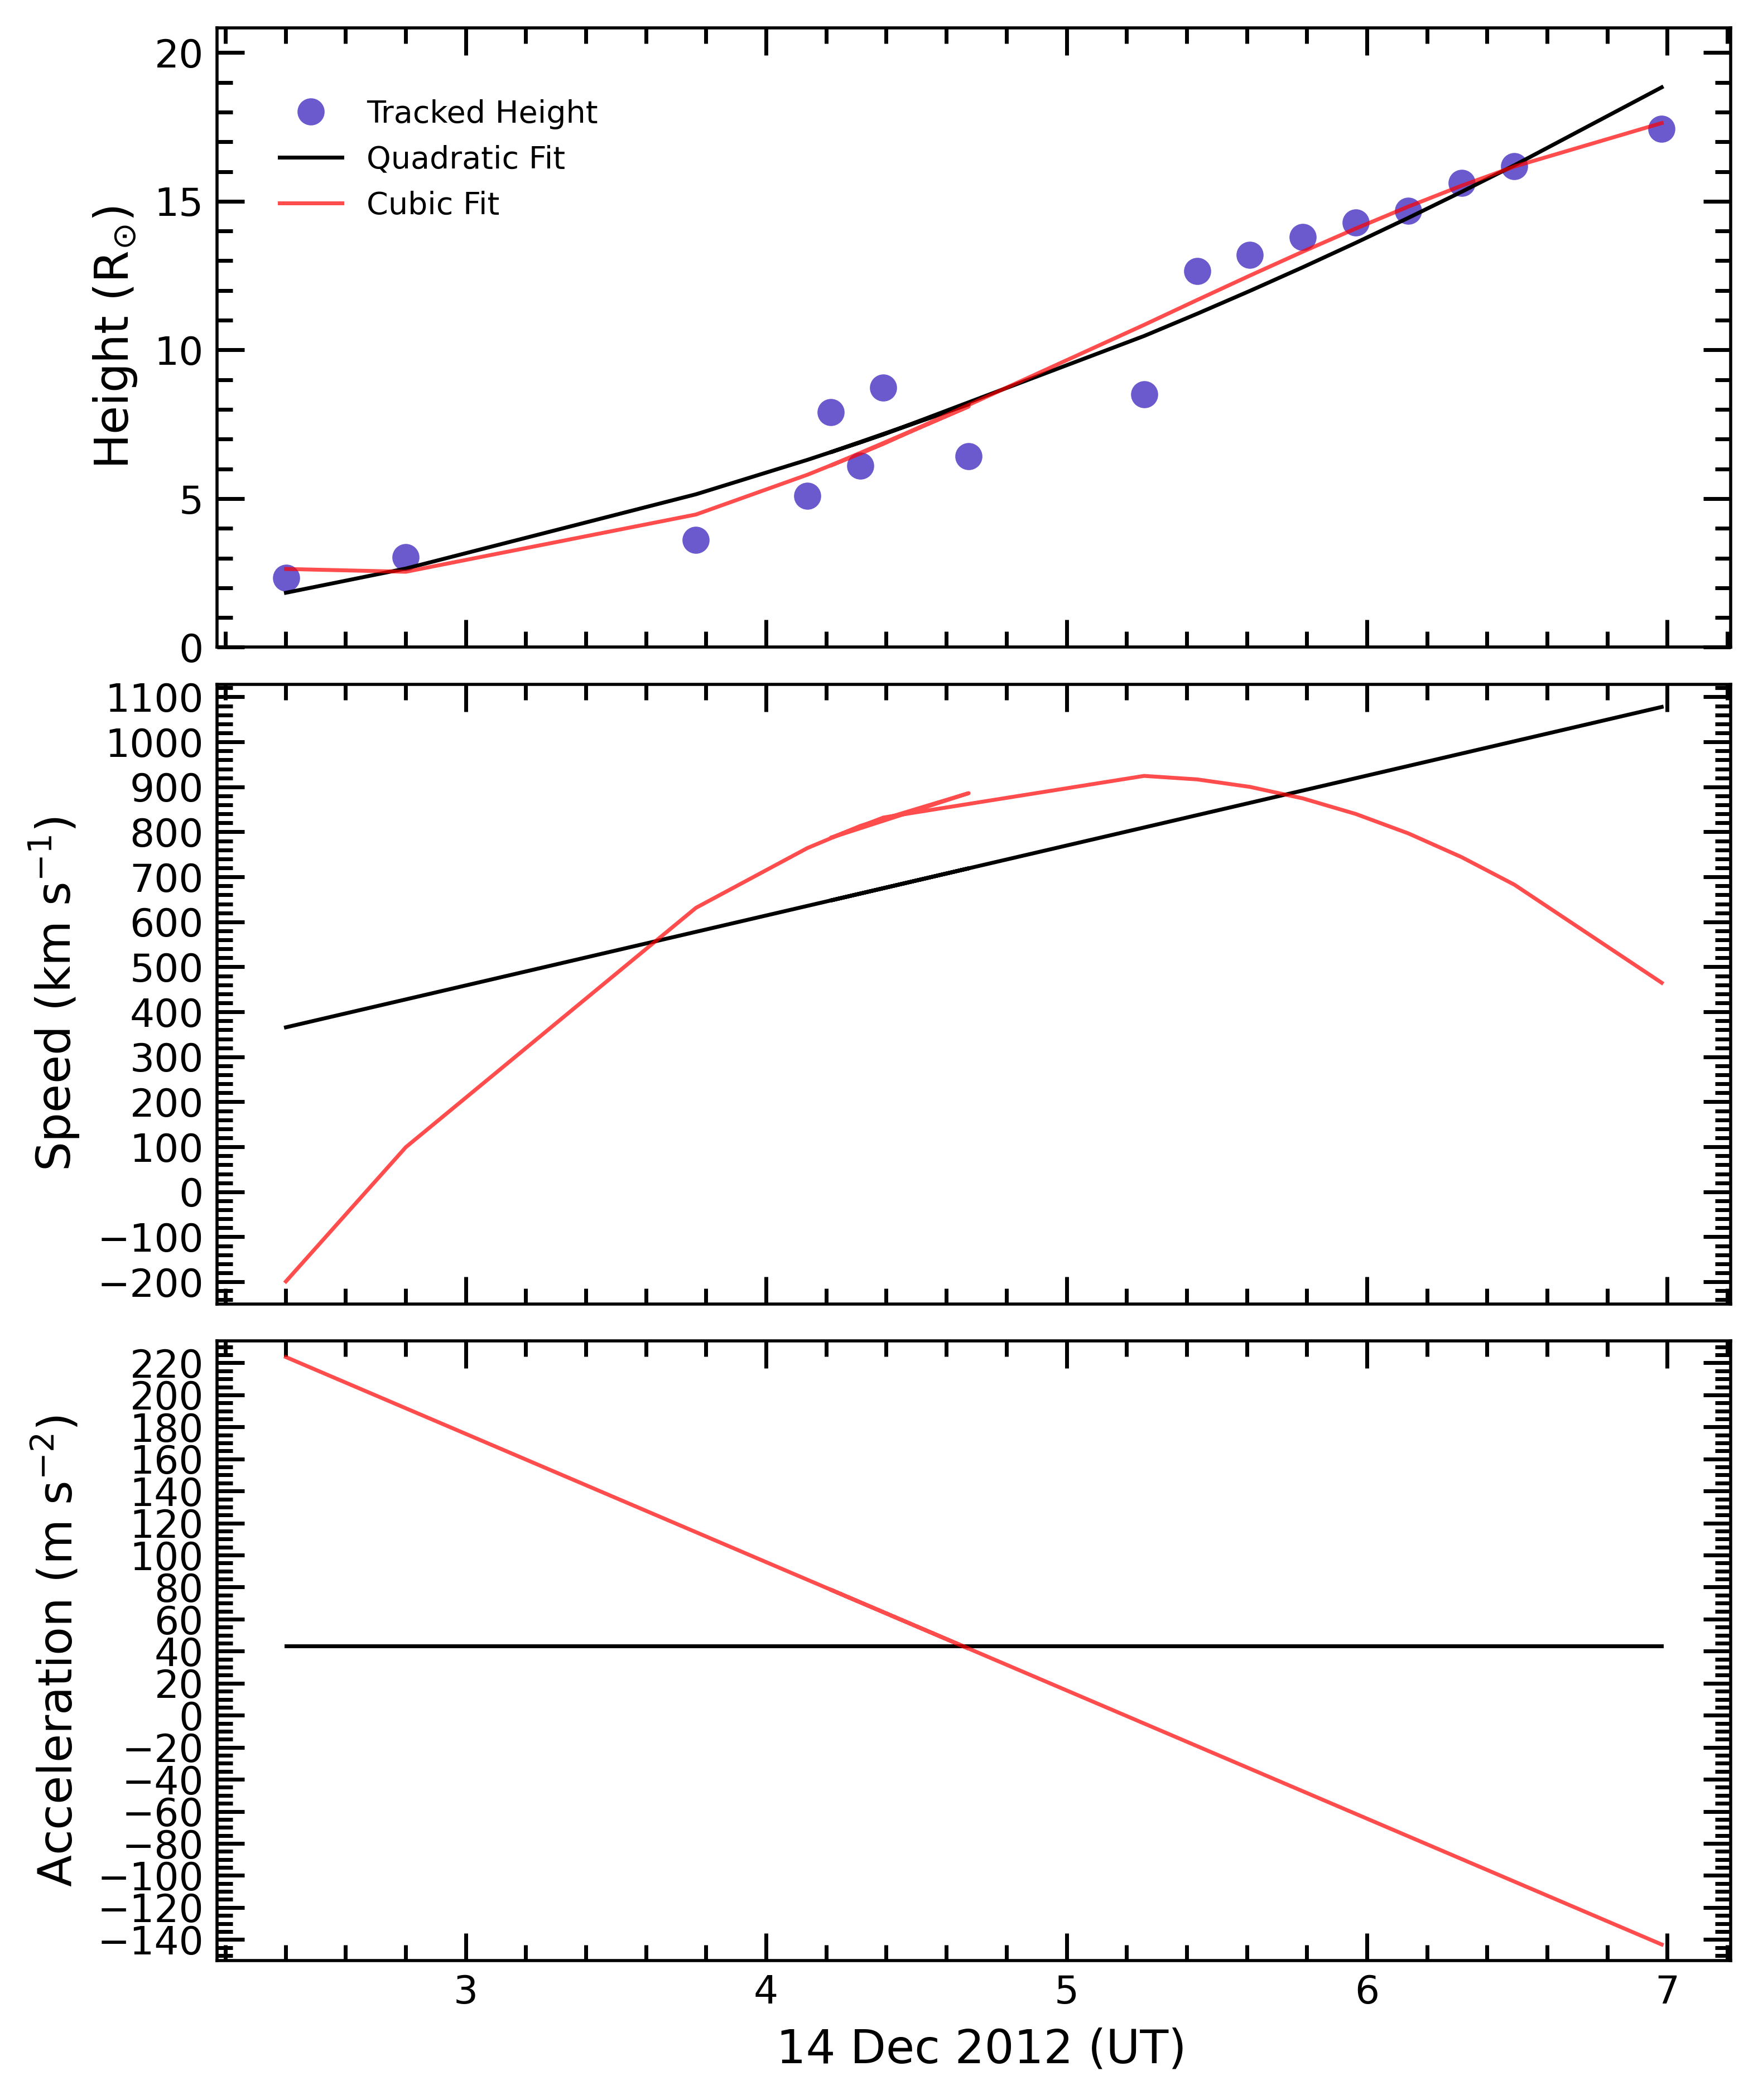

In [16]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
plt.figure(figsize=(7, 9))
plt.rcParams['figure.dpi']=500.0
font = 12
line =1
alp = 0.7

plt.subplot(3,1,1)
plt.plot(t, hei, 'o', label = 'Tracked Height', color = 'slateblue')
plt.plot(t, hei_qua, 'k', linewidth = line, label = 'Quadratic Fit')
plt.plot(t, hei_cub, 'red', linewidth = line, alpha = alp, label = 'Cubic Fit')
plt.ylabel('Height (R$_{\odot}$)', fontsize = font)
plt.ylim(0, max(max(hei_qua), max(hei_cub)) + 2)
plt.gca().yaxis.set_major_locator(MultipleLocator(5))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))
plt.legend(bbox_to_anchor=[0.27, 0.93], frameon = False, fontsize = 8)

plt.subplot(3,1,2)
plt.plot(t, vel_qua, 'k', linewidth = line)
plt.plot(t, vel_cub, 'red', alpha = alp, linewidth = line)
plt.ylabel('Speed (km s$^{-1}$)', fontsize = font)
plt.ylim(min(min(vel_qua), min(vel_cub)) - 50, max(max(vel_qua), max(vel_cub)) + 50)
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))

for subplot in range(1,3):
    plt.subplot(3, 1, subplot)
    plt.tick_params(right = True, top = True, labeltop = False, labelbottom =False, axis = 'both',
                   which='major', length=7, direction = 'in', labelsize =10, width = 1.0)
    plt.tick_params(right = True, top = True, labeltop = False, labelbottom =False, axis = 'both',
                   which='minor', length=4, direction = 'in', labelsize =10, width = 1.0)
    
plt.subplot(3,1,3)
plt.plot(t, acc_qua, 'k', linewidth = line)
plt.plot(t, acc_cub, 'red', alpha = alp, linewidth = line)
plt.ylabel('Acceleration (m s$^{-2}$)', fontsize = font)
plt.ylim(min(min(acc_qua), min(acc_cub)) - 10, max(max(acc_qua),max(acc_cub)) + 10)
plt.gca().yaxis.set_major_locator(MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(4))    

for subplot in range(1, 4):
    plt.subplot(3, 1, subplot)
    plt.gca().xaxis.set_major_locator(MultipleLocator(1))
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))

plt.tick_params(right = True, top = True, labeltop = False, labelbottom =True, axis = 'both',
                   which='major', length=7, direction = 'in', labelsize =10, width = 1.0)
plt.tick_params(right = True, top = True, labeltop = False, labelbottom =True, axis = 'both',
                   which='minor', length=4, direction = 'in', labelsize =10, width = 1.0)

plt.xlabel(f" {day} {mon} {year} (UT)", fontsize = font)
plt.subplots_adjust(hspace = 0.06)
plt.savefig("ICMEtracking.png")